## 1. Importing Required Libraries

We start by importing essential Python libraries:
- `pandas` for data manipulation
- `matplotlib` and `seaborn` for visualization



In [1]:
# Import necessary libraries for data handling and plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a clean seaborn style for plots
sns.set_theme()  # Or use: plt.style.use('seaborn-white')


## 2. Loading the Electricity Load Dataset

The dataset contains **hourly electricity demand** (in megawatts) for Hungary over one month. We load the dataset from a locally uploaded CSV and convert the `DateTime` column to proper datetime format for time-series operations.


In [4]:
# Load the uploaded electricity CSV file correctly
df = pd.read_csv('/content/hungary_load_sample.csv', parse_dates=['DateTime'])

# Preview the first few rows
df.head()



,DateTime,Load_MW
0,2023-01-01 00:00:00,2049.671415
1,2023-01-01 01:00:00,2018.920551
2,2023-01-01 02:00:00,2130.122199
3,2023-01-01 03:00:00,2249.982063
4,2023-01-01 04:00:00,2106.170031


## 3. Exploring the Dataset

We check the shape and structure of the dataset, verify the timestamp formatting, and ensure there are no missing values before analysis.


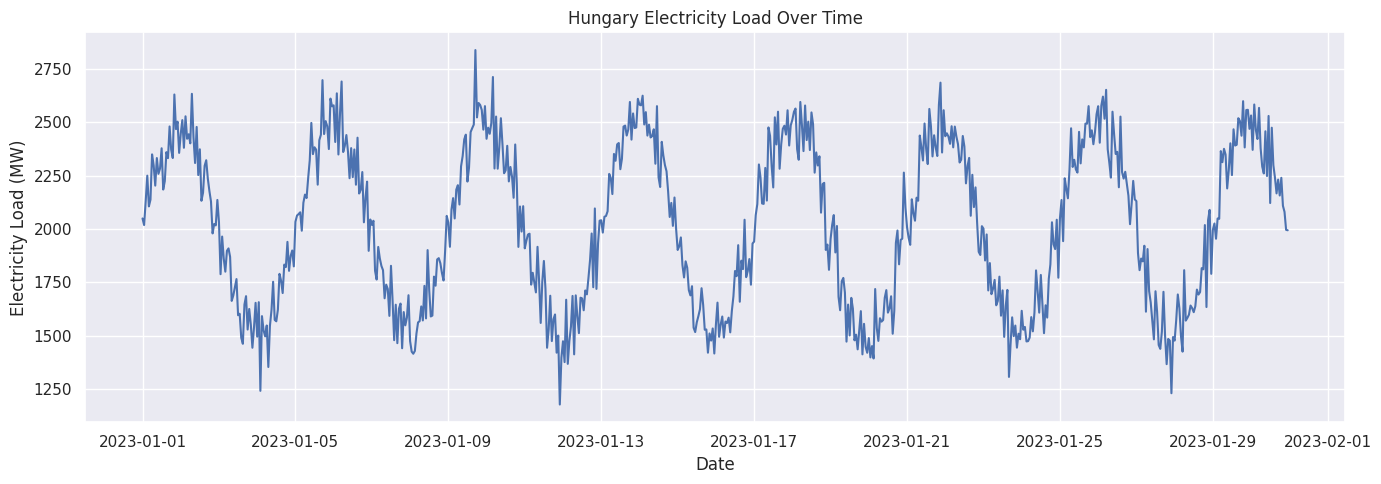

In [5]:
# Plot full electricity load over time
plt.figure(figsize=(14, 5))  # Set width and height of the plot
sns.lineplot(data=df, x='DateTime', y='Load_MW')  # Create line plot
plt.title('Hungary Electricity Load Over Time')  # Plot title
plt.xlabel('Date')  # X-axis label
plt.ylabel('Electricity Load (MW)')  # Y-axis label
plt.tight_layout()  # Fit elements nicely
plt.show()


## 4. Time-Series Visualization

We plot the full electricity load time-series to observe general trends and fluctuations. This helps identify high and low demand periods and check for daily patterns.


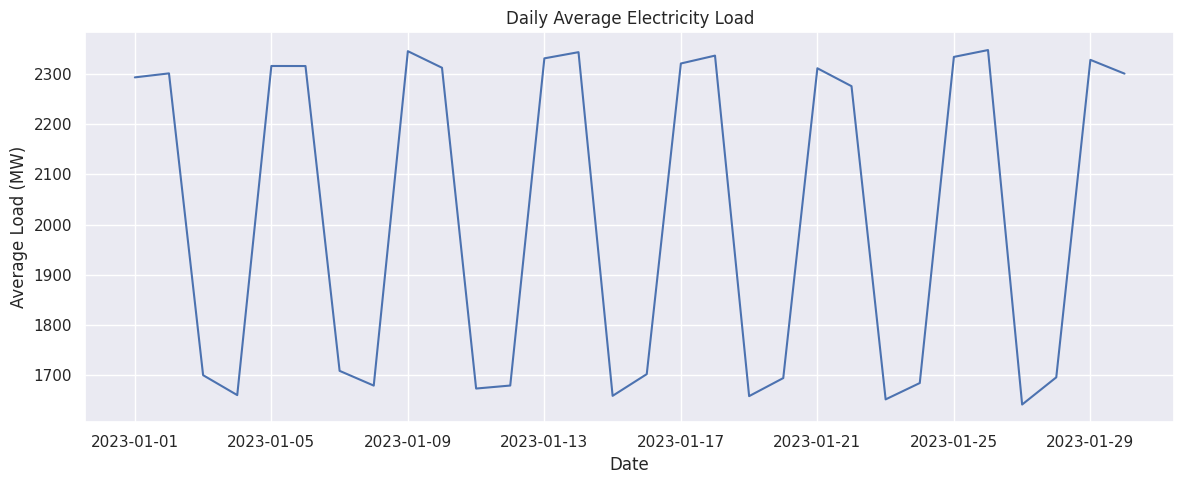

In [6]:
# Convert 'DateTime' column to datetime (just to ensure)
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as index
df.set_index('DateTime', inplace=True)

# Resample by day and calculate mean load
daily_avg = df['Load_MW'].resample('D').mean()

# Plot daily average electricity load
plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title('Daily Average Electricity Load')
plt.xlabel('Date')
plt.ylabel('Average Load (MW)')
plt.tight_layout()
plt.show()


## 5. Daily Average Load Analysis

Using resampling, we group the hourly data into daily averages. This provides a cleaner, higher-level view of energy consumption trends over time.


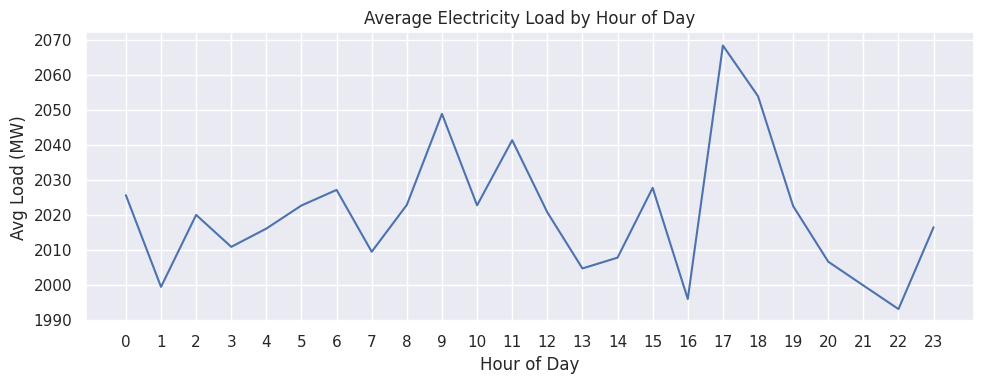

In [7]:
# Reset index to access 'DateTime' as a column again
df = df.reset_index()

# Extract hour from the datetime column
df['Hour'] = df['DateTime'].dt.hour  # This gives 0–23

# Group by hour and calculate average load
hourly_pattern = df.groupby('Hour')['Load_MW'].mean()

# Plot average load by hour of day
plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_pattern.index, y=hourly_pattern.values)
plt.title('Average Electricity Load by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Load (MW)')
plt.xticks(range(0, 24))  # Show 0 to 23 on x-axis
plt.grid(True)
plt.tight_layout()
plt.show()


## 6. Forecasting Electricity Load Using Moving Average

To simulate short-term forecasting, we apply a 24-hour moving average on the hourly load data. This method smooths the data and gives insight into future load behavior — useful for real-time smart grid operations.



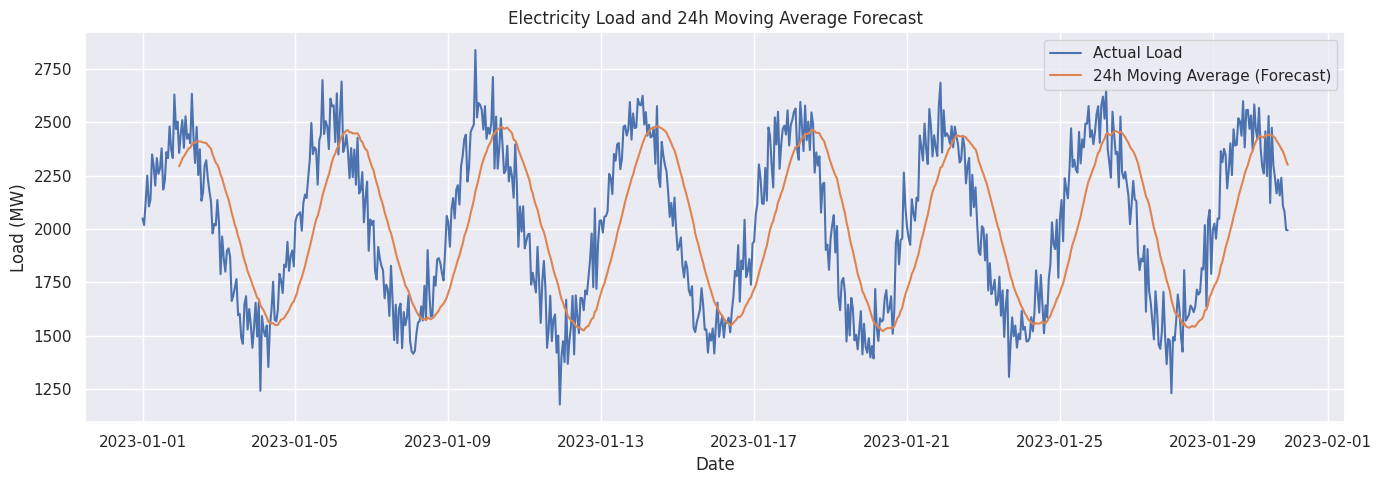

In [8]:
# Set DateTime as index again if needed
df.set_index('DateTime', inplace=True)

# Apply 24-hour moving average (1 day) on hourly data
df['Load_MA_24h'] = df['Load_MW'].rolling(window=24).mean()

# Plot both original and smoothed trend
plt.figure(figsize=(14,5))
sns.lineplot(data=df['Load_MW'], label='Actual Load')
sns.lineplot(data=df['Load_MA_24h'], label='24h Moving Average (Forecast)')
plt.title('Electricity Load and 24h Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.tight_layout()
plt.show()
